In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import os 
os.getcwd()

'C:\\Users\\AGRAWAP'

In [4]:
os.chdir("C:\\Users\\AGRAWAP\\Desktop")

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df = df.loc[df['prop_id'] == 104517]
df = df.loc[df['srch_room_count'] == 1]
df = df.loc[df['visitor_location_country_id'] == 219]
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [7]:
df = df.loc[df['price_usd'] < 5584]

In [8]:
df.date_time = pd.to_datetime(df.date_time)

In [9]:
df_original= df.copy()

In [96]:
df_original.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0


In [97]:
df_original.to_csv("sampled_train.csv")

In [98]:
df= pd.read_csv("sampled_train.csv")

In [99]:
df.head()

,Unnamed: 0,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
0,2041,2013-03-14 11:27:28,206.0,99,1
1,3152,2013-01-03 20:48:24,186.0,6,0
2,5166,2013-01-19 16:51:27,61.0,1,0
3,10135,2013-01-26 11:34:23,72.0,116,0
4,10560,2013-04-29 09:39:50,246.0,245,0


In [100]:
df.set_index('date_time', inplace= True)

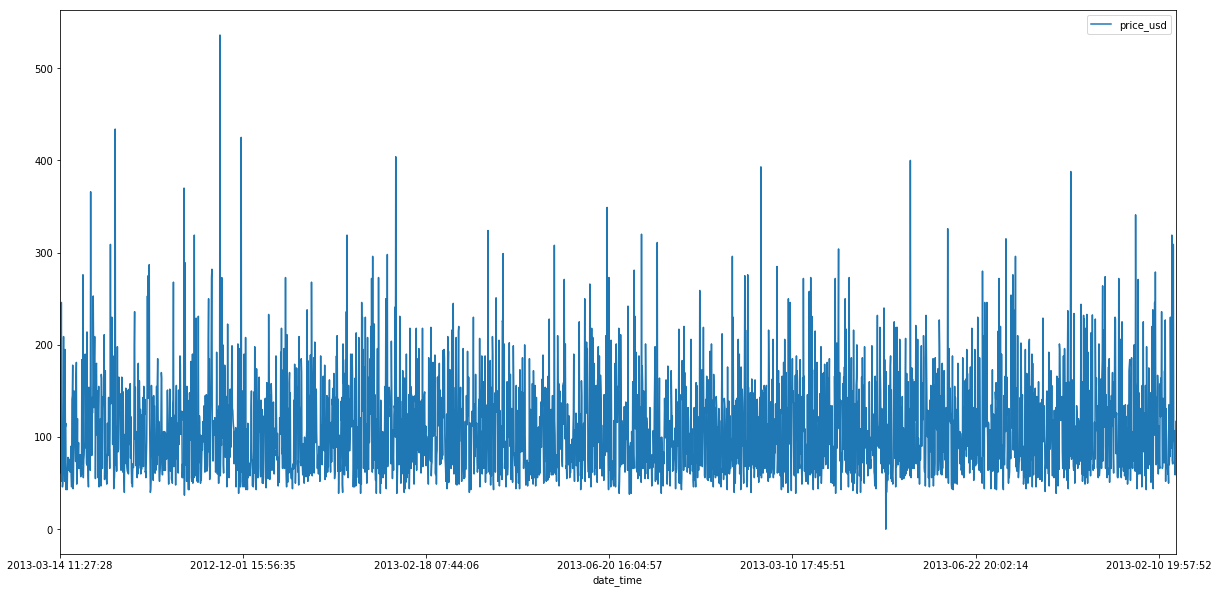

In [101]:
df[['price_usd']].plot(figsize=(20,10))

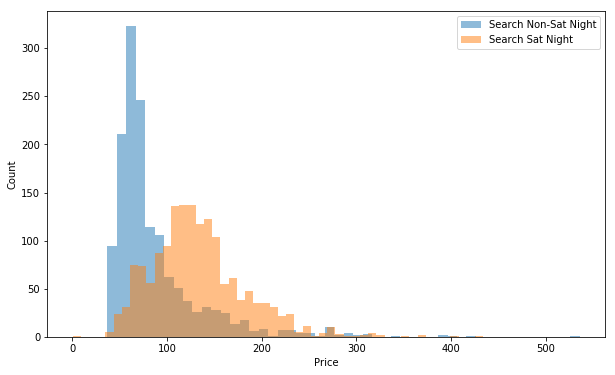

In [102]:
a= df.loc[df['srch_saturday_night_bool']==0, 'price_usd']
b= df.loc[df['srch_saturday_night_bool']==1, 'price_usd']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [25]:
#clustering bases anomoly detection
data = df_original[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

no_of_cluster=[]
scores= []

from sklearn.cluster import KMeans 

for i in range(1,20):
    km = KMeans(n_clusters= i)
    km.fit(data)
    no_of_cluster.append(i)

    scores.append(km.score(data))

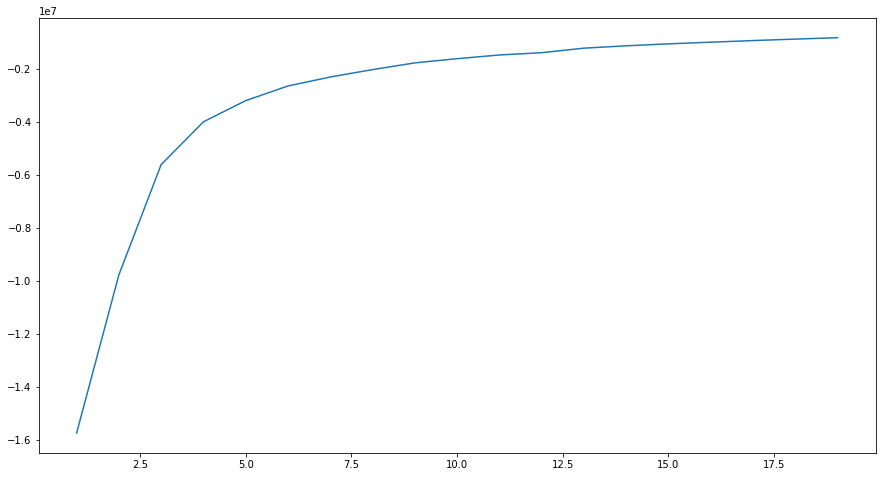

In [26]:
plt.figure(figsize=(15,8))
plt.plot(no_of_cluster, scores)
plt.show()

In [112]:
df.reset_index(inplace=True)
df.head()

,date_time,Unnamed: 0,price_usd,srch_booking_window,srch_saturday_night_bool,anomaly1,anomaly2
0,2013-03-14 11:27:28,2041,206.0,99,1,NaN,NaN
1,2013-01-03 20:48:24,3152,186.0,6,0,NaN,NaN
2,2013-01-19 16:51:27,5166,61.0,1,0,NaN,NaN
3,2013-01-26 11:34:23,10135,72.0,116,0,NaN,NaN
4,2013-04-29 09:39:50,10560,246.0,245,0,NaN,NaN


In [113]:
#optimal value = 10 from the above graph 

data = df_original[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
data= data.reset_index(drop=True)
from sklearn.cluster import KMeans 

km = KMeans(n_clusters= 10)
km.fit(data)
km.predict(data)
labels= km.labels_

data['labels']= pd.Series(labels)

In [114]:
data.head()

,price_usd,srch_booking_window,srch_saturday_night_bool,labels
0,206.0,99,1,8
1,186.0,6,0,4
2,61.0,1,0,0
3,72.0,116,0,3
4,246.0,245,0,6


In [115]:
def getDistanceBypoint(data,model):
    
    distance= pd.Series()
    for i in range(len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outlier_fraction = 0.01


data = data[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
distance= getDistanceBypoint(data,km)

number_of_outliers = int(outlier_fraction*len(distance))



C:\Users\AGRAWAP\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [1]:
threshold = distance.nlargest(number_of_outliers).min()
df['anomaly1']= (distance >threshold).astype(int)

type(threshold)

NameError: name 'distance' is not defined

In [117]:
df.head()

,date_time,Unnamed: 0,price_usd,srch_booking_window,srch_saturday_night_bool,anomaly1,anomaly2
0,2013-03-14 11:27:28,2041,206.0,99,1,1,NaN
1,2013-01-03 20:48:24,3152,186.0,6,0,0,NaN
2,2013-01-19 16:51:27,5166,61.0,1,0,0,NaN
3,2013-01-26 11:34:23,10135,72.0,116,0,0,NaN
4,2013-04-29 09:39:50,10560,246.0,245,0,1,NaN


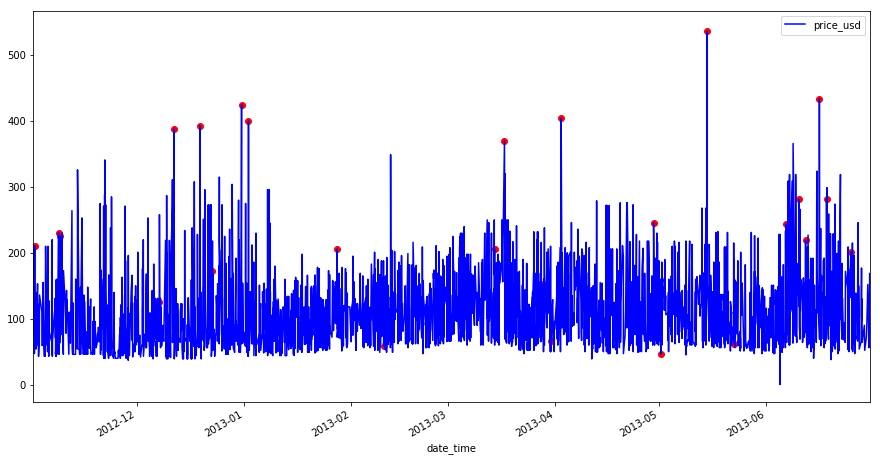

In [120]:
anomaly_data1= df.loc[df['anomaly1']==1, ['date_time', 'price_usd']]

df.plot('date_time', 'price_usd', c='b', figsize= (15,8))
plt.scatter(anomaly_data['date_time'], anomaly_data['price_usd'], c='r')
plt.show()

In [ ]:
# Isolation forest for anomaly detection 

C:\Users\AGRAWAP\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


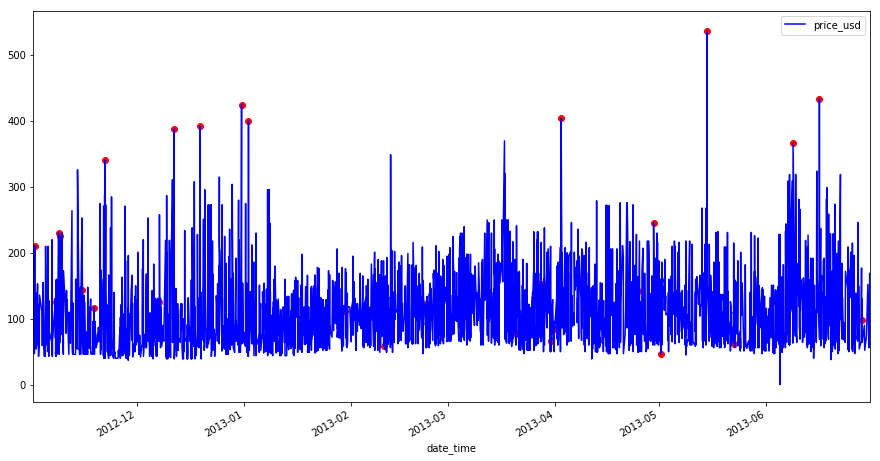

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler= StandardScaler()
scaled_data= scaler.fit_transform(data)
data= pd.DataFrame(scaled_data)

#model Building 

model = IsolationForest(contamination = 0.01)
model.fit(data)
df['anomaly2']= pd.Series(model.predict(data))

#visualisation 

anomaly_data2= df.loc[df['anomaly2']==-1, ['date_time', 'price_usd']]
df.plot('date_time', 'price_usd', c='b', figsize= (15,8))
plt.scatter(anomaly_data2['date_time'], anomaly_data2['price_usd'], c='r')
plt.show()

In [110]:
#OneClassSVM

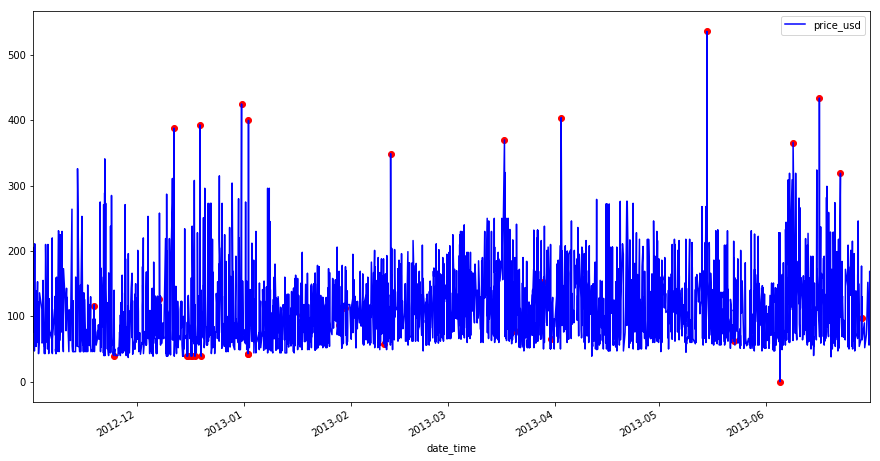

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler= StandardScaler()
scaled_data= scaler.fit_transform(data)
data= pd.DataFrame(scaled_data)

#model Building 

model =  OneClassSVM(nu = 0.01, kernel= "rbf", gamma=0.01)
model.fit(data)
df['anomaly3']= pd.Series(model.predict(data))

#visualisation 

anomaly_data3= df.loc[df['anomaly3']==-1, ['date_time', 'price_usd']]
df.plot('date_time', 'price_usd', c='b', figsize= (15,8))
plt.scatter(anomaly_data3['date_time'], anomaly_data3['price_usd'], c='r')
plt.show()

In [123]:
df['anomaly3'] = df['anomaly3'].replace(-1,0)

,date_time,Unnamed: 0,price_usd,srch_booking_window,srch_saturday_night_bool,anomaly1,anomaly2,anomaly3
0,2013-03-14 11:27:28,2041,206.0,99,1,1,1,1
1,2013-01-03 20:48:24,3152,186.0,6,0,0,1,1
2,2013-01-19 16:51:27,5166,61.0,1,0,0,1,1
3,2013-01-26 11:34:23,10135,72.0,116,0,0,1,1
4,2013-04-29 09:39:50,10560,246.0,245,0,1,-1,1


In [125]:
df['anomaly2'] = df['anomaly2'].replace(-1,0)

In [126]:
df['anomaly2'].value_counts()

1    3017
0      31
Name: anomaly2, dtype: int64

In [128]:
df= df.drop(['Unnamed: 0'], 1)

In [131]:
df = df.set_index('date_time')

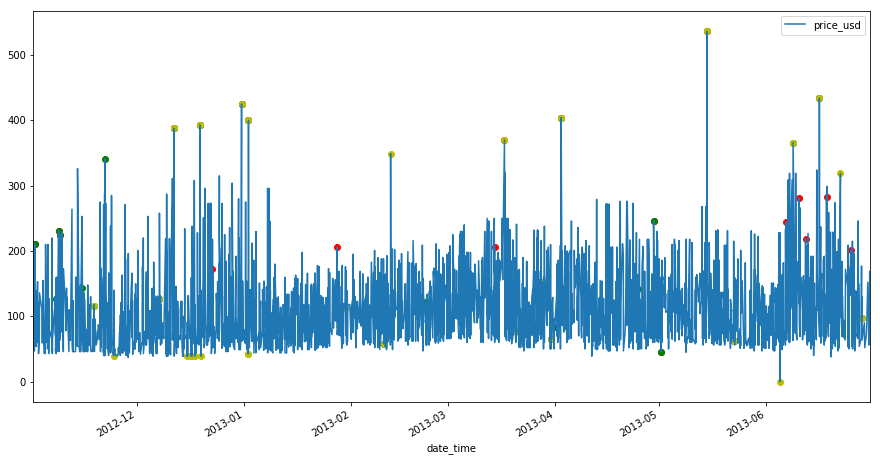

In [137]:
df[['price_usd']].plot(figsize= (15,8))
plt.scatter(anomaly_data1['date_time'], anomaly_data1['price_usd'], c='r')
plt.scatter(anomaly_data2['date_time'], anomaly_data2['price_usd'], c='g')
plt.scatter(anomaly_data3['date_time'], anomaly_data3['price_usd'], c='y')
plt.show()